<a href="https://colab.research.google.com/github/EfratNechama/EfratNechama/blob/main/basic_model_400epochs_0_85accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
from matplotlib import pyplot
# from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam # - Works

import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load train and test dataset
def extract_zip():
	# load dataset
  file=np.load(r"drive/MyDrive/data_modified.npz")
  data_npz = dict(zip(("{}".format(k) for k in file), (file[k] for k in file)))
	# one hot encode target values
	# trainY = to_categorical(trainY)
	# testY = to_categorical(testY)
  return data_npz['train'], data_npz['ytrain'], data_npz['validation'], data_npz['yvalidation'], data_npz['test'], data_npz['ytest']

In [4]:
def load_dataset():
  trainX, trainY, validationX, vlidationY, testX, testY = extract_zip()
  return trainX, to_categorical(trainY), validationX, to_categorical(vlidationY), testX, to_categorical(testY)




In [5]:
trainX, trainY, validationX, vlidationY, testX, testY = load_dataset()
# print(f'trainx= {trainX} , trainy= {trainY}')


In [6]:
# scale pixels
def prep_pixels(train, validation, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	validation_norm = validation.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	validation_norm = validation_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm,validation_norm, test_norm


In [13]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(16, activation='softmax'))
 	# compile model
	# opt = Adam(learning_rate=0.001)
	model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [14]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='validation')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='validation')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	# pyplot.close()

In [9]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY,validationX, validationY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, validationX, testX = prep_pixels(trainX,validationX, testX)
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	# prepare iterator
	it_train = datagen.flow(trainX, trainY, batch_size=32)
	# fit model
	steps = int(trainX.shape[0] /32)
	history = model.fit(it_train, steps_per_epoch=steps, epochs=400, validation_data=(validationX, vlidationY), verbose=1)
	# evaluate model
	_, acc = model.evaluate(validationX, validationY, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

In [ ]:
# entry point, run the test harness
run_test_harness()

Epoch 1/400
1406/1406 [==============================] - 31s 21ms/step - loss: 2.1436 - accuracy: 0.3305 - val_loss: 1.7039 - val_accuracy: 0.4453
Epoch 2/400
1406/1406 [==============================] - 30s 22ms/step - loss: 1.5878 - accuracy: 0.4767 - val_loss: 1.2477 - val_accuracy: 0.5845
Epoch 3/400
1406/1406 [==============================] - 30s 21ms/step - loss: 1.3728 - accuracy: 0.5531 - val_loss: 1.2530 - val_accuracy: 0.5915
Epoch 4/400
1406/1406 [==============================] - 29s 21ms/step - loss: 1.2389 - accuracy: 0.5954 - val_loss: 0.9636 - val_accuracy: 0.6803
Epoch 5/400
1406/1406 [==============================] - 30s 21ms/step - loss: 1.1520 - accuracy: 0.6241 - val_loss: 1.0582 - val_accuracy: 0.6529
Epoch 6/400
1406/1406 [==============================] - 29s 21ms/step - loss: 1.0738 - accuracy: 0.6507 - val_loss: 0.9169 - val_accuracy: 0.7003
Epoch 7/400
1406/1406 [==============================] - 30s 21ms/step - loss: 1.0136 - accuracy: 0.6728 - val_loss: 0

Epoch 1/10
703/703 [==============================] - 24s 33ms/step - loss: 2.6592 - accuracy: 0.2249 - val_loss: 1.8887 - val_accuracy: 0.3808
Epoch 2/10
703/703 [==============================] - 23s 32ms/step - loss: 2.0882 - accuracy: 0.3221 - val_loss: 1.7393 - val_accuracy: 0.4191
Epoch 3/10
703/703 [==============================] - 24s 33ms/step - loss: 1.9188 - accuracy: 0.3657 - val_loss: 1.6659 - val_accuracy: 0.4439
Epoch 4/10
703/703 [==============================] - 23s 33ms/step - loss: 1.8203 - accuracy: 0.3987 - val_loss: 1.6393 - val_accuracy: 0.4477
Epoch 5/10
703/703 [==============================] - 23s 33ms/step - loss: 1.7477 - accuracy: 0.4214 - val_loss: 1.5355 - val_accuracy: 0.4873
Epoch 6/10
703/703 [==============================] - 23s 33ms/step - loss: 1.6790 - accuracy: 0.4447 - val_loss: 1.6607 - val_accuracy: 0.4391
Epoch 7/10
703/703 [==============================] - 23s 32ms/step - loss: 1.6268 - accuracy: 0.4643 - val_loss: 1.4927 - val_accuracy:

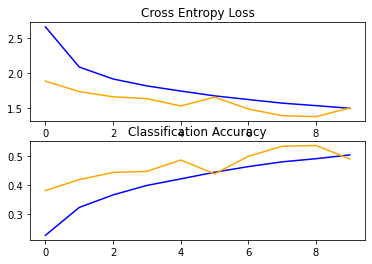

In [19]:
# entry point, run the test harness
run_test_harness()

Epoch 1/10
175/175 [==============================] - 22s 116ms/step - loss: 3.1859 - accuracy: 0.1577 - val_loss: 2.6828 - val_accuracy: 0.1213
Epoch 2/10
175/175 [==============================] - 20s 116ms/step - loss: 2.5208 - accuracy: 0.2385 - val_loss: 2.2295 - val_accuracy: 0.2815
Epoch 3/10
175/175 [==============================] - 20s 112ms/step - loss: 2.3156 - accuracy: 0.2792 - val_loss: 2.0353 - val_accuracy: 0.3423
Epoch 4/10
175/175 [==============================] - 20s 112ms/step - loss: 2.1813 - accuracy: 0.3055 - val_loss: 1.9249 - val_accuracy: 0.3772
Epoch 5/10
175/175 [==============================] - 19s 110ms/step - loss: 2.1010 - accuracy: 0.3244 - val_loss: 1.8402 - val_accuracy: 0.3997
Epoch 6/10
175/175 [==============================] - 19s 110ms/step - loss: 2.0401 - accuracy: 0.3398 - val_loss: 1.9300 - val_accuracy: 0.3695
Epoch 7/10
175/175 [==============================] - 19s 110ms/step - loss: 2.0004 - accuracy: 0.3512 - val_loss: 1.8059 - val_ac

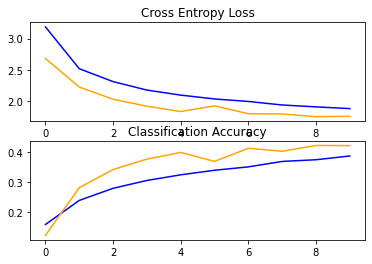

In [24]:
# entry point, run the test harness
run_test_harness()

In [1]:
# entry point, run the test harness
run_test_harness()

NameError: ignored